In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

this wk's (2/3 period?)

In [7]:
data = pd.read_msgpack("data_2018-10-15-20-12-58.msgpack")
X0 = pd.DataFrame.from_dict(data)
X0.head()

,F,MDia,Msgtype,PWM,Rc,Rw,T,T0,TimeStamp
0,-0.712154,1.0,2,0,27.200001,0.35,25.716726,26.293409,13.313081
1,0.914309,1.0,2,0,27.200001,0.35,25.716726,26.293409,13.332105
2,-0.839522,1.0,2,0,27.200001,0.35,25.716726,26.293409,13.342064
3,-0.074151,1.0,2,0,27.200001,0.35,25.716726,26.293409,13.352174
4,-0.978092,1.0,2,0,27.200001,0.35,25.716726,26.293409,13.371239


last wk's

In [16]:
data = pd.read_msgpack("data_2018-10-10-18-15-06.msgpack")
X1 = pd.DataFrame.from_dict(data)
X1.head()

,F,MDia,Msgtype,PWM,Rc,Rw,T,T0,TimeStamp
0,-1.924732,1.0,2,0,29.1,0.4,29.597118,26.686825,36.826424
1,-1.903733,1.0,2,0,29.1,0.4,29.597118,26.686825,36.840061
2,-1.318297,1.0,2,0,29.1,0.4,29.596083,26.689442,36.850365
3,-0.999092,1.0,2,0,29.1,0.4,29.596083,26.689442,36.869370
4,-2.489463,1.0,2,0,29.1,0.4,29.599459,26.689442,36.888580


In [19]:
X1.columns = ["f", "mdia", "msgtype", "pwm", "rc", "rw", "t", "t0", "timestamp"]
X1.head()

,f,mdia,msgtype,pwm,rc,rw,t,t0,timestamp
0,-1.924732,1.0,2,0,29.1,0.4,29.597118,26.686825,36.826424
1,-1.903733,1.0,2,0,29.1,0.4,29.597118,26.686825,36.840061
2,-1.318297,1.0,2,0,29.1,0.4,29.596083,26.689442,36.850365
3,-0.999092,1.0,2,0,29.1,0.4,29.596083,26.689442,36.869370
4,-2.489463,1.0,2,0,29.1,0.4,29.599459,26.689442,36.888580


In [20]:
if(X1.iloc[0].timestamp > 0):
    X1.timestamp -= X0.iloc[0].timestamp

AttributeError: 'Series' object has no attribute 'timestamp'

In [14]:
X0.pwm.replace(to_replace=0, value=np.NaN, inplace=True)
X1.pwm.replace(to_replace=0, value=np.NaN, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'pwm'

AttributeError: 'DataFrame' object has no attribute 'timestamp'

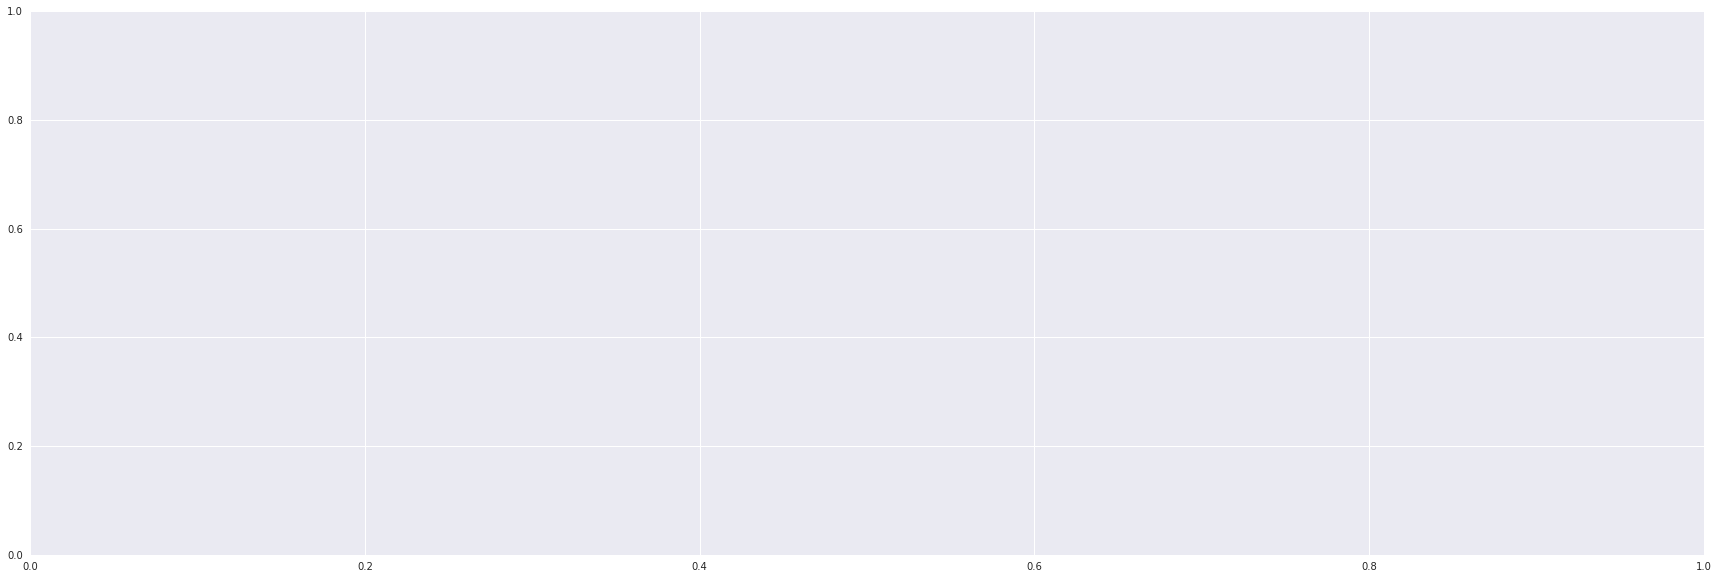

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(30,10))
sns.regplot(X0.timestamp, -X0.f, fit_reg=False, scatter_kws={"s": 2, "alpha":0.3})
sns.regplot(X1.timestamp, -X1.f, fit_reg=False, scatter_kws={"s": 2, "alpha":0.3})

AttributeError: 'DataFrame' object has no attribute 'timestamp'

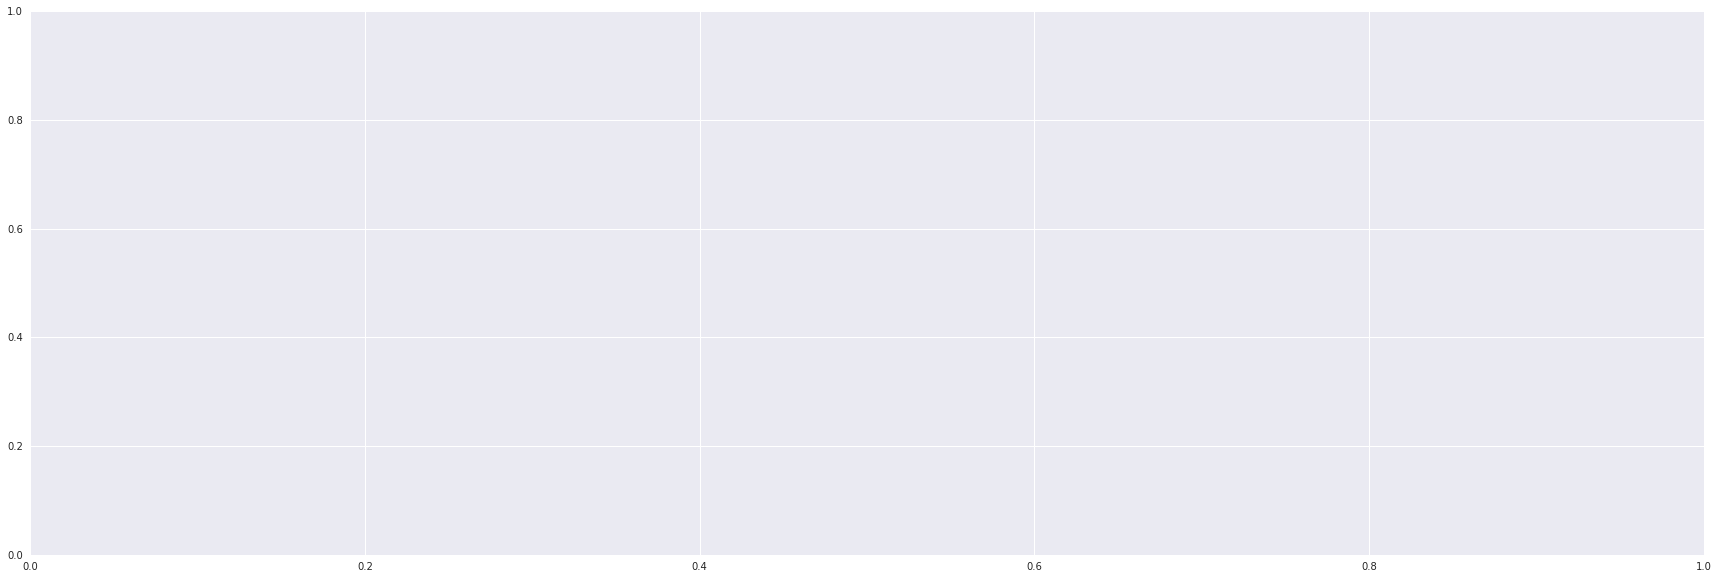

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(30,10))
sns.regplot(X0.timestamp, X0.t, fit_reg=False, scatter_kws={"s": 2, "alpha":0.3})
sns.regplot(X1.timestamp, X1.t, fit_reg=False, scatter_kws={"s": 2, "alpha":0.3})
fig.plot()

In [24]:
from statsmodels.tsa.tsatools import detrend
from scipy.optimize import curve_fit

In [27]:
def func(x, a, b, c): 
    return a * np.exp(-b*x) + c

In [34]:
temp0 = X0.iloc[10000:,:]
temp0.timestamp -= temp0.timestamp.iloc[0]
temp0.reset_index(drop=True);
y0t, X0t = temp0.t, temp0.timestamp

/home/nwchen/.local/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
temp1 = X1.iloc[10000:,:]
temp1.timestamp -= temp1.timestamp.iloc[0]
temp1.reset_index(drop=True);
y1t, X1t = temp1.t, temp1.timestamp

/home/nwchen/.local/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


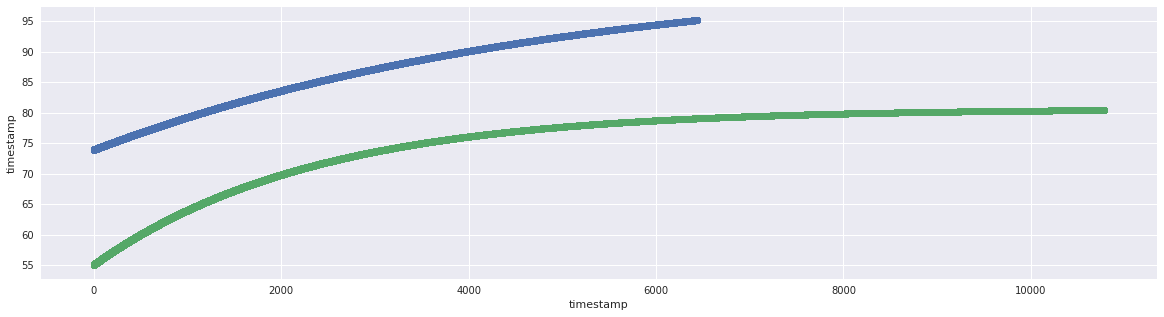

In [33]:
pt0, pcov0 = curve_fit(func, X0t, y0t)
pt1, pcov = curve_fit(func, X1t, y1t)
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.regplot(X0t, func(X0t, *pt0), fit_reg=False, ax=ax)
sns.regplot(X1t, func(X1t, *pt1), fit_reg=False, ax=ax)

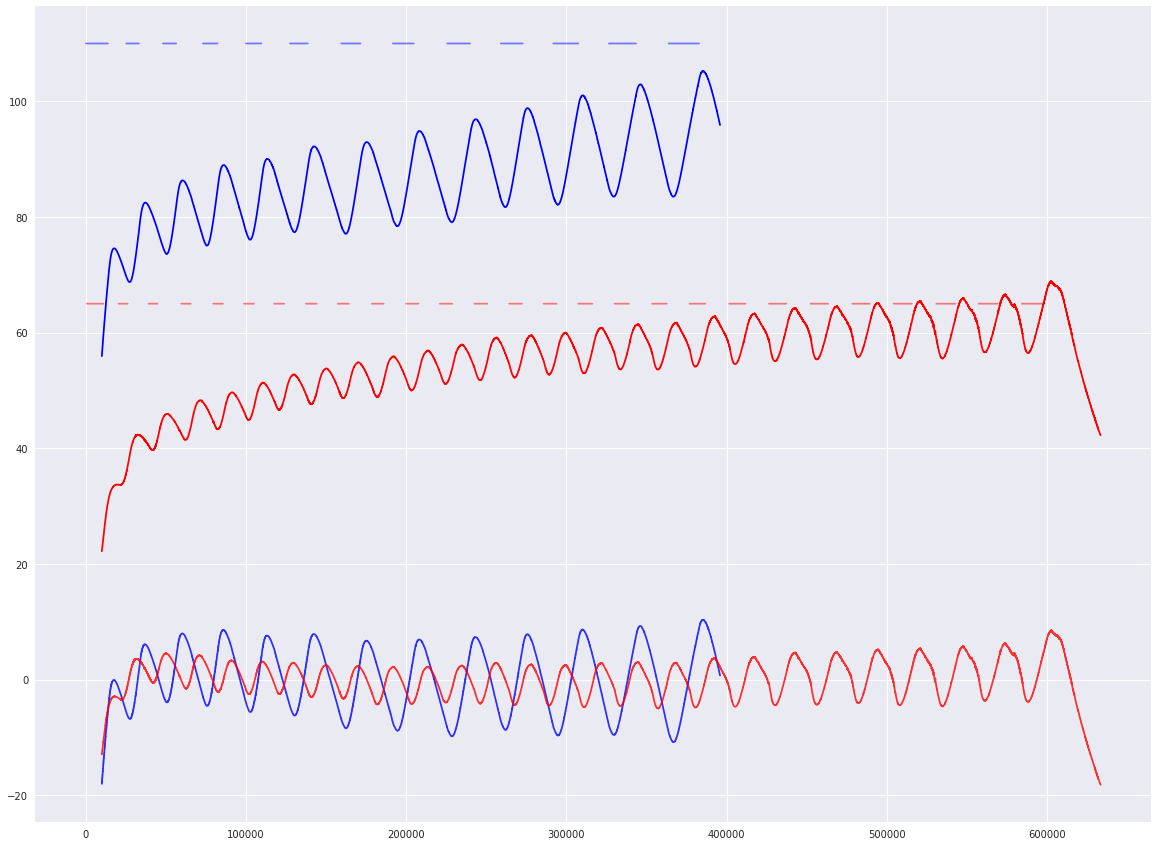

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.plot(y0t-func(X0t, *pt0), 'b', alpha=0.8)
ax.plot(temp0.t, 'b')
ax.plot(y1t-func(X1t, *pt1), 'r', alpha=0.8)
ax.plot(temp1.t-20, 'r')
ax.plot(X0.pwm-65, 'b', alpha=0.5)
ax.plot(X1.pwm-110, 'r', alpha=0.5)

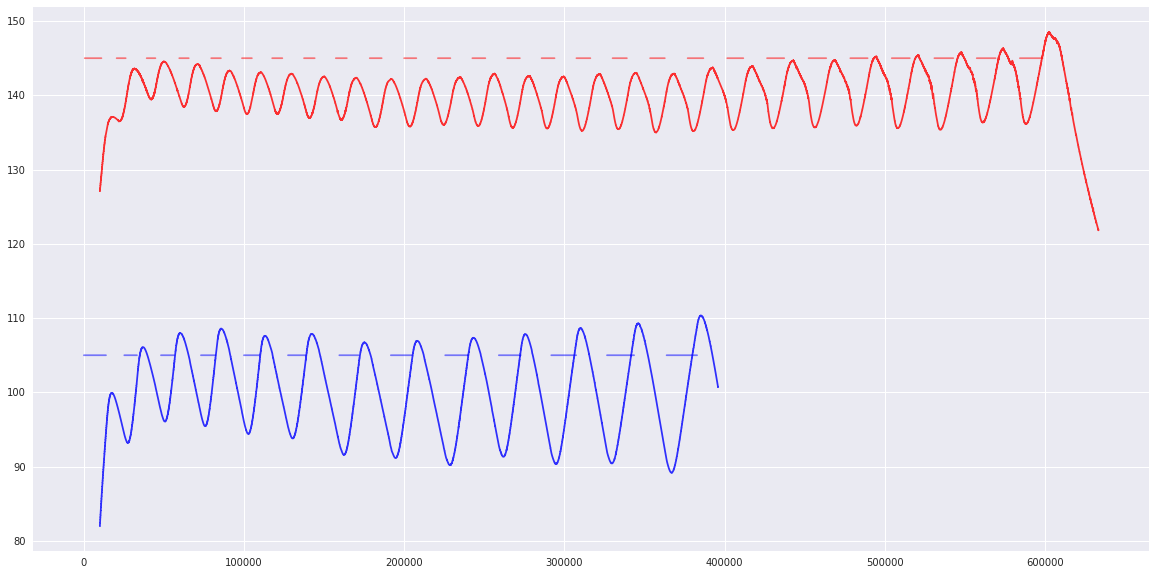

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(y0t-func(X0t, *pt0)+100, 'b', alpha=0.8)
ax.plot(y1t-func(X1t, *pt1)+140, 'r', alpha=0.8)
ax.plot(X0.pwm-70, 'b', alpha=0.5)
ax.plot(X1.pwm-30, 'r', alpha=0.5)